# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### YOUR NAME HERE

**Honor Pledge:**  
I pledge on my honor that I, **Vishnu Vamshi Vidyapathi Sharma**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [4]:
import sklearn
sklearn.__version__

'1.0.2'

In [5]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [4]:
# Your package imports here

In [86]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,confusion_matrix, recall_score, precision_score, balanced_accuracy_score, f1_score,accuracy_score
from sklearn.metrics import accuracy_score

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [7]:
df = pd.read_csv('gas_emissions.csv')

In [8]:
df.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [26]:
df.shape

(7384, 11)

There are 7384 rows and 11 columns in the dataset.

#### Is there any missing data?

In [9]:
 df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

No missinng values

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [10]:
df[df['CO'] > 3]['AP'].mean()

1015.6900173490633

#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

In [11]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.493098,-0.466288,0.468976,0.193578,0.330112,0.208277,0.109437,0.200909,-0.390647,-0.593580
AP,-0.493098,1.000000,0.084381,-0.094144,-0.043730,-0.081605,-0.290147,0.050326,0.029420,0.200945,0.214236
AH,-0.466288,0.084381,1.000000,-0.245456,-0.297708,-0.260683,0.026251,-0.182732,-0.221706,0.158999,0.065351
AFDP,0.468976,-0.094144,-0.245456,1.000000,0.843958,0.915128,-0.519807,0.884954,0.922991,-0.640789,-0.584452
GTEP,0.193578,-0.043730,-0.297708,0.843958,1.000000,0.892851,-0.620652,0.932337,0.938142,-0.557177,-0.366655
TIT,0.330112,-0.081605,-0.260683,0.915128,0.892851,1.000000,-0.396161,0.951813,0.951590,-0.738092,-0.520081
TAT,0.208277,-0.290147,0.026251,-0.519807,-0.620652,-0.396161,1.000000,-0.633933,-0.656613,0.025768,0.054455
TEY,0.109437,0.050326,-0.182732,0.884954,0.932337,0.951813,-0.633933,1.000000,0.991207,-0.616791,-0.403278
CDP,0.200909,0.029420,-0.221706,0.922991,0.938142,0.951590,-0.656613,0.991207,1.000000,-0.612653,-0.443093
CO,-0.390647,0.200945,0.158999,-0.640789,-0.557177,-0.738092,0.025768,-0.616791,-0.612653,1.000000,0.678394


In [12]:
highcorr = df.corr().abs() > 0.9
print(highcorr)

         AT     AP     AH   AFDP   GTEP    TIT    TAT    TEY    CDP     CO  \
AT     True  False  False  False  False  False  False  False  False  False   
AP    False   True  False  False  False  False  False  False  False  False   
AH    False  False   True  False  False  False  False  False  False  False   
AFDP  False  False  False   True  False   True  False  False   True  False   
GTEP  False  False  False  False   True  False  False   True   True  False   
TIT   False  False  False   True  False   True  False   True   True  False   
TAT   False  False  False  False  False  False   True  False  False  False   
TEY   False  False  False  False   True   True  False   True   True  False   
CDP   False  False  False   True   True   True  False   True   True  False   
CO    False  False  False  False  False  False  False  False  False   True   
NOX   False  False  False  False  False  False  False  False  False  False   

        NOX  
AT    False  
AP    False  
AH    False  
AFDP  F

#### Create a scatter plot of 'TEY' vs 'CDP'

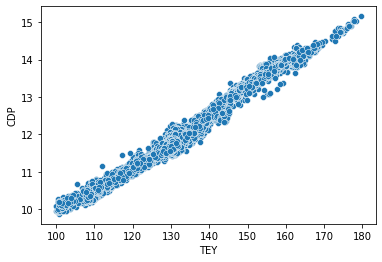

In [13]:
sns.scatterplot(data=df, x='TEY', y='CDP')
plt.show()

<AxesSubplot:xlabel='CDP', ylabel='TEY'>

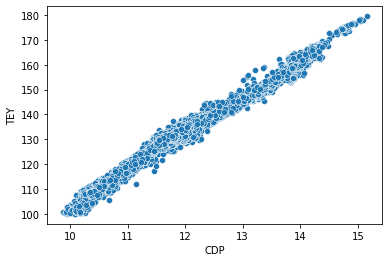

#### Create histograms for CO and NOX.

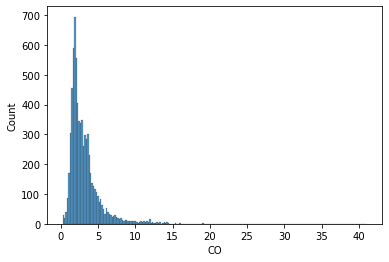

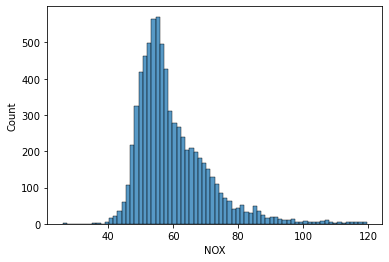

In [14]:
sns.histplot(data=df, x='CO')
plt.show()
sns.histplot(data=df, x='NOX')
plt.show()

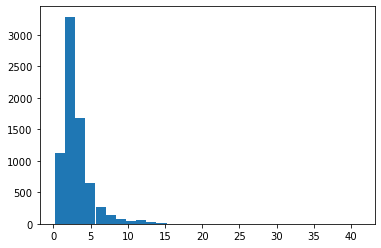

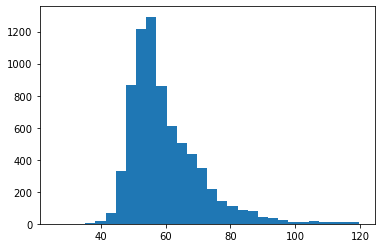

#### Create a sctter plot of CO vs NOX.

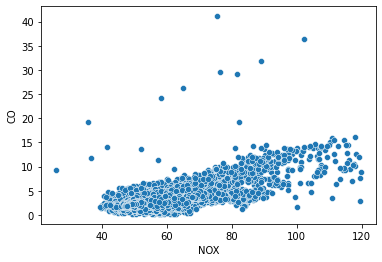

In [18]:
sns.scatterplot(data=df,x='NOX', y='CO')
plt.show()

<AxesSubplot:xlabel='NOX', ylabel='CO'>

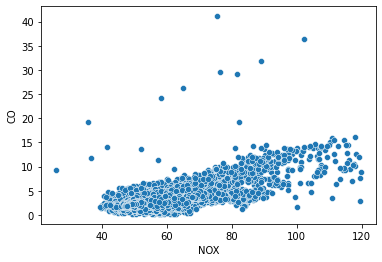

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [19]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [21]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [22]:
X_train.shape

(5316, 9)

In [23]:
X_val.shape

(1329, 9)

In [27]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [28]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

#fit model to training data
lr.fit(X_train, y_train)

#Prediction on training and validation data
y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)

#R2 and RMSE for training and validation data
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_val)

print("Training R2:", r2_train)
print("Validation R2:", r2_val)
print("Training RMSE:", np.sqrt(mse_train))
print("Validation RMSE:", np.sqrt(mse_val))

Training R2: 0.6640090820784397
Validation R2: 0.646343190818214
Training RMSE: 1.2720122104103533
Validation RMSE: 1.3884894690085985


## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [52]:
#fit model to training data
estimator.fit(X_train, y_train)

#Prediction on training and validation data
y_pred_train2 = estimator.predict(X_train)
y_pred_val2 = estimator.predict(X_val)

#R2 and RMSE for training and validation data
r2_train2 = r2_score(y_train, y_pred_train2)
r2_val2 = r2_score(y_val, y_pred_val2)

mse_train2 = mean_squared_error(y_train, y_pred_train2)
mse_val2 = mean_squared_error(y_val, y_pred_val2)

print("Training R2:", r2_train2)
print("Validation R2:", r2_val2)
print("Training RMSE:", np.sqrt(mse_train2))
print("Validation RMSE:", np.sqrt(mse_val2))

Training R2: 0.9635412068046666
Validation R2: 0.7558012206331827
Training RMSE: 0.419014117669241
Validation RMSE: 1.1537808394478866


The training and validation R2 score is not small because it is not able to explain all the variance but only some. It can use some hyper parameter tuning to bring it down.

In [98]:
estimator_imp = RandomForestRegressor(n_estimators=250, max_depth=5, min_samples_split=10, random_state=RANDOM_STATE)
estimator_imp.fit(X_train, y_train)

#Prediction on training and validation data
y_pred_train_imp = estimator_imp.predict(X_train)
y_pred_val_imp = estimator_imp.predict(X_val)

#R2 and RMSE for training and validation data
r2_train_imp = r2_score(y_train, y_pred_train_imp)
r2_val_imp = r2_score(y_val, y_pred_val_imp)

mse_train_imp = mean_squared_error(y_train, y_pred_train_imp)
mse_val_imp = mean_squared_error(y_val, y_pred_val_imp)

print("Training R2:", r2_train_imp)
print("Validation R2:", r2_val_imp)
print("Training RMSE:", np.sqrt(mse_train_imp))
print("Validation RMSE:", np.sqrt(mse_val_imp))


Training R2: 0.8191246789048213
Validation R2: 0.7455615444451178
Training RMSE: 0.9332911952440882
Validation RMSE: 1.177722449160911


The different is brought down by performing hyperparameter tuning 

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [54]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [55]:
estimator = SVR(kernel='linear')
estimator

SVR(kernel='linear')

In [56]:
#fit model to training data
estimator.fit(X_train, y_train)

#Prediction on training and validation data
y_pred_train3 = estimator.predict(X_train)
y_pred_val3 = estimator.predict(X_val)

#R2 and RMSE for training and validation data
r2_train3 = r2_score(y_train, y_pred_train3)
r2_val3 = r2_score(y_val, y_pred_val3)

mse_train3 = mean_squared_error(y_train, y_pred_train3)
mse_val3 = mean_squared_error(y_val, y_pred_val3)

print("Training R2:", r2_train3)
print("Validation R2:", r2_val3)
print("Training RMSE:", np.sqrt(mse_train3))
print("Validation RMSE:", np.sqrt(mse_val3))

Training R2: 0.6244164650454904
Validation R2: 0.6021524213732284
Training RMSE: 1.3448714796326715
Validation RMSE: 1.4726852520481604


### Polynomial Kernel SVM Regressor

In [106]:
from sklearn.svm import SVR
estimator = SVR(kernel='poly')

In [107]:
#fit model to training data
estimator.fit(X_train, y_train)

#Prediction on training and validation data
y_pred_train4 = estimator.predict(X_train)
y_pred_val4 = estimator.predict(X_val)

#R2 and RMSE for training and validation data
r2_train4 = r2_score(y_train, y_pred_train4)
r2_val4 = r2_score(y_val, y_pred_val4)

mse_train4 = mean_squared_error(y_train, y_pred_train4)
mse_val4 = mean_squared_error(y_val, y_pred_val4)

print("Training R2:", r2_train4)
print("Validation R2:", r2_val4)
print("Training RMSE:", np.sqrt(mse_train4))
print("Validation RMSE:", np.sqrt(mse_val4))

Training R2: 0.7404852376508417
Validation R2: 0.7310487212257806
Training RMSE: 1.1179143857689047
Validation RMSE: 1.2108445318365073


### RBF Kernel SVM Regressor

In [63]:
from sklearn.svm import SVR
estimator = SVR(kernel='rbf')

In [67]:
#fit model to training data
estimator.fit(X_train, y_train)

#Prediction on training and validation data
y_pred_train5 = estimator.predict(X_train)
y_pred_val5 = estimator.predict(X_val)

#R2 and RMSE for training and validation data
r2_train5 = r2_score(y_train, y_pred_train5)
r2_val5 = r2_score(y_val, y_pred_val5)

mse_train5 = mean_squared_error(y_train, y_pred_train5)
mse_val5 = mean_squared_error(y_val, y_pred_val5)

print("Training R2:", r2_train5)
print("Validation R2:", r2_val5)
print("Training RMSE:", np.sqrt(mse_train5))
print("Validation RMSE:", np.sqrt(mse_val5))

Training R2: 0.7653225070588421
Validation R2: 0.7476173201040636
Training RMSE: 1.0630733502205558
Validation RMSE: 1.1729550025939752


### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [62]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
y_pred_train6 = best_estimator.predict(X_train)
y_pred_val6 = best_estimator.predict(X_val)

#R2 and RMSE for training and validation data
r2_train6 = r2_score(y_train, y_pred_train6)
r2_val6 = r2_score(y_val, y_pred_val6)

mse_train6 = mean_squared_error(y_train, y_pred_train6)
mse_val6 = mean_squared_error(y_val, y_pred_val6)

print("Training R2:", r2_train6)
print("Validation R2:", r2_val6)
print("Training RMSE:", np.sqrt(mse_train6))
print("Validation RMSE:", np.sqrt(mse_val6))

Training R2: 0.792240509871014
Validation R2: 0.7568500533368783
Training RMSE: 1.0002485869508342
Validation RMSE: 1.1513004313829813


## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression. Use the models: 
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR` model from before. Do you observe any change in performance? Please explain. 


In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


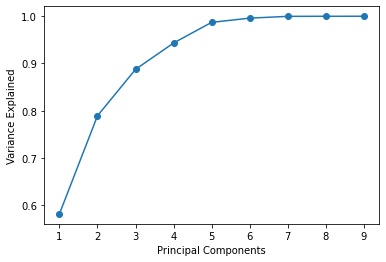

In [72]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [74]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [75]:
lrpca = LinearRegression()

#fit model to training data
lrpca.fit(X_train_pca2, y_train)

#Prediction on training and validation data
y_pred_train7 = lrpca.predict(X_train_pca2)
y_pred_val7 = lrpca.predict(X_val_pca2)

#R2 and RMSE for training and validation data
r2_train7 = r2_score(y_train, y_pred_train7)
r2_val7 = r2_score(y_val, y_pred_val7)

mse_train7 = mean_squared_error(y_train, y_pred_train7)
mse_val7 = mean_squared_error(y_val, y_pred_val7)

print("Training R2:", r2_train7)
print("Validation R2:", r2_val7)
print("Training RMSE:", np.sqrt(mse_train7))
print("Validation RMSE:", np.sqrt(mse_val7))

Training R2: 0.6557906042002006
Validation R2: 0.6333206399655549
Training RMSE: 1.2874751982855395
Validation RMSE: 1.413822244602062


**RF Regression with PCA transformed data**

In [76]:
rfpca = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
#fit model to training data
rfpca.fit(X_train_pca2, y_train)

#Prediction on training and validation data
y_pred_train8 = rfpca.predict(X_train_pca2)
y_pred_val8 = rfpca.predict(X_val_pca2)

#R2 and RMSE for training and validation data
r2_train8 = r2_score(y_train, y_pred_train8)
r2_val8 = r2_score(y_val, y_pred_val8)

mse_train8 = mean_squared_error(y_train, y_pred_train8)
mse_val8 = mean_squared_error(y_val, y_pred_val8)

print("Training R2:", r2_train8)
print("Validation R2:", r2_val8)
print("Training RMSE:", np.sqrt(mse_train8))
print("Validation RMSE:", np.sqrt(mse_val8))

Training R2: 0.9630548121704725
Validation R2: 0.7372337558608612
Training RMSE: 0.4217998787395343
Validation RMSE: 1.1968407422860916


**SVM Regression with PCA transformed data**

In [77]:
svrpca = SVR(kernel='rbf')
svrpca.fit(X_train_pca2, y_train)

#Prediction on training and validation data
y_pred_train9 = svrpca.predict(X_train_pca2)
y_pred_val9 = svrpca.predict(X_val_pca2)

#R2 and RMSE for training and validation data
r2_train9 = r2_score(y_train, y_pred_train9)
r2_val9 = r2_score(y_val, y_pred_val9)

mse_train9 = mean_squared_error(y_train, y_pred_train9)
mse_val9 = mean_squared_error(y_val, y_pred_val9)

print("Training R2:", r2_train9)
print("Validation R2:", r2_val9)
print("Training RMSE:", np.sqrt(mse_train9))
print("Validation RMSE:", np.sqrt(mse_val9))

Training R2: 0.7602260497214572
Validation R2: 0.7469051026270978
Training RMSE: 1.0745546560256456
Validation RMSE: 1.1746088611596983


- Comparing Linear Regression model to Linear Regression with PCA model, we can see there Training and Validation R2 has decresed in the PCA model but Training and Validation RMSE has increased slightly.
- Comapring RF regression model to RF Regression with PCA model, we can see the same slighlt decrease in Training and Validation R2 scores and slight increase in RMSE scores. 
- SVR RBF with PCA and SVR RBF shows almost the same scores. 

There is a slight change in performance as PCA is beneficial for reduction of dimensionality trading-off model's performance. Hence, it is worth noting what is in priority for the task while performing PCA. 

## Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [78]:
from sklearn.preprocessing import Binarizer

In [79]:
binarizer = Binarizer(threshold=3)

In [80]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [81]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot:>

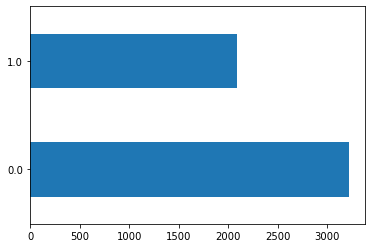

In [82]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [83]:
from sklearn.svm import SVC

In [84]:
estimator = SVC(kernel ='rbf')

#### SVC Model 1 

In [87]:
estimator.fit(X_train, y_train_cat)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_cat)

bestmodel1 = grid_search.best_estimator_

ypred_val = bestmodel1.predict(X_val)

conf_matrix1 = confusion_matrix(y_val_cat, ypred_val)
recall1 = recall_score(y_val_cat, ypred_val)
precision1 = precision_score(y_val_cat, ypred_val)
accuracy1 = accuracy_score(y_val_cat, ypred_val)
f1_score1 = f1_score(y_val_cat, ypred_val)
balanced_accuracy1 = balanced_accuracy_score(y_val_cat, ypred_val)


print(conf_matrix1)
print("Recall (Sensitivity):", recall1)
print("Precision:", precision1)
print("Accuracy:", accuracy1)
print("F1 Score:", f1_score1)
print("Balanced Accuracy:", balanced_accuracy1)

[[762  50]
 [ 68 449]]
Recall (Sensitivity): 0.8684719535783365
Precision: 0.8997995991983968
Accuracy: 0.9112114371708051
F1 Score: 0.8838582677165354
Balanced Accuracy: 0.9034477994492668


#### SVC Model 2

In [88]:
estimator.fit(X_train_pca2, y_train_cat)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search2 = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid_search2.fit(X_train_pca2, y_train_cat)

bestmodel2 = grid_search2.best_estimator_

ypred_val2 = bestmodel2.predict(X_val_pca2)

conf_matrix2 = confusion_matrix(y_val_cat, ypred_val2)
recall2 = recall_score(y_val_cat, ypred_val2)
precision2 = precision_score(y_val_cat, ypred_val2)
accuracy2 = accuracy_score(y_val_cat, ypred_val2)
f1_score2 = f1_score(y_val_cat, ypred_val2)
balanced_accuracy2 = balanced_accuracy_score(y_val_cat, ypred_val2)


print(conf_matrix2)
print("Recall (Sensitivity):", recall2)
print("Precision:", precision2)
print("Accuracy:", accuracy2)
print("F1 Score:", f1_score2)
print("Balanced Accuracy:", balanced_accuracy)

[[764  48]
 [ 70 447]]
Recall (Sensitivity): 0.8646034816247582
Precision: 0.9030303030303031
Accuracy: 0.9112114371708051
F1 Score: 0.8833992094861659
Balanced Accuracy: 0.9027450905660737


## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

We can do **Polynomial Features** and **Gradient Boosinting Regressor** to improve the regression performance

In [97]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_train_poly = lr_poly.predict(X_train_poly)
y_pred_val_poly = lr_poly.predict(X_val_poly)

r2_train_poly = r2_score(y_train, y_pred_train_poly)
r2_val_poly = r2_score(y_val, y_pred_val_poly)

print("Training R2:", r2_train_poly)
print("Validation R2:", r2_val_poly)


Training R2: 0.7691883892609054
Validation R2: 0.7399170869980767


In [96]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred_train_gbr = gbr.predict(X_train)
y_pred_val_gbr = gbr.predict(X_val)

r2_train_gbr = r2_score(y_train, y_pred_train_gbr)
r2_val_gbr = r2_score(y_val, y_pred_val_gbr)


print("Training R2:", r2_train_gbr)
print("Validation R2:", r2_val_gbr)

Training R2: 0.8847367660221577
Validation R2: 0.7438798294656955


We can see that Validation score of the regression has increased in both the methods used above compared to Linear Regression validation R2 score performed initially. 

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [102]:
# Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbm.fit(X_train, y_train_cat)
ypred_val_gbm = gbm.predict(X_val)

In [104]:
#Performance metrics for Gradient Boosting Machine
conf_matrix_gbm = confusion_matrix(y_val_cat, ypred_val_gbm)
recall_gbm = recall_score(y_val_cat, ypred_val_gbm)
precision_gbm = precision_score(y_val_cat, ypred_val_gbm)
accuracy_gbm = accuracy_score(y_val_cat, ypred_val_gbm)
f1_score_gbm = f1_score(y_val_cat, ypred_val_gbm)
balanced_accuracy_gbm = balanced_accuracy_score(y_val_cat, ypred_val_gbm)

print("Confusion Matrix:\n", conf_matrix_gbm)
print("Recall (Sensitivity):", recall_gbm)
print("Precision:", precision_gbm)
print("Accuracy:", accuracy_gbm)
print("F1 Score:", f1_score_gbm)
print("Balanced Accuracy:", balanced_accuracy_gbm)

Confusion Matrix:
 [[758  54]
 [ 74 443]]
Recall (Sensitivity): 0.8568665377176016
Precision: 0.8913480885311871
Accuracy: 0.9036869826937547
F1 Score: 0.8737672583826429
Balanced Accuracy: 0.8951820373317072


## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



In [108]:
# YOUR CODE
# Prediction on test data
y_pred_test_imp = estimator_imp.predict(X_test)
y_pred_test4 = estimator.predict(X_test)

# R2 and RMSE for test data
r2_test_imp = r2_score(y_test, y_pred_test_imp)
r2_test4 = r2_score(y_test, y_pred_test4)

mse_test_imp = mean_squared_error(y_test, y_pred_test_imp)
mse_test4 = mean_squared_error(y_test, y_pred_test4)

# Print performance metrics
print("Random Forest Regressor Test Performance:")
print("R2:", r2_test_imp)
print("RMSE:", np.sqrt(mse_test_imp))

print("\nSupport Vector Regressor Test Performance:")
print("R2:", r2_test4)
print("RMSE:", np.sqrt(mse_test4))


Random Forest Regressor Test Performance:
R2: 0.5393754774082125
RMSE: 1.5839418469792836

Support Vector Regressor Test Performance:
R2: 0.5105320772237196
RMSE: 1.632780567840026


Random Forest Regressor with parametrer tuning is the best model. But I was expecting a much more better performance on the testing model. 

- What did you learn in this project? Any suggestions?

# Your comments
This assignment really helps in choosing right models and gives an idea of various steps we can take to improve a particular we find interesting!

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_